### Ex1:

$$ p(w \mid D)->w=\left(X^{T} X+\alpha * I\right)-1 X^{T} t $$

#### Answer : 


$$
\begin{gathered}
p(w \mid x, t, \alpha, \beta) \propto p(t \mid x, w, \beta) p(w \mid \alpha) \\
=>\log (p(w \mid x, t, \alpha, \beta) \propto \log (p(t \mid x, w, \beta) p(w \mid \alpha))
\end{gathered}
$$
We have:
$$
\begin{gathered}
p(t \mid x, w, \beta)=\prod_{n=1}^{N} N\left(t_{n} \mid y\left(x_{n}, w\right), \beta^{-1}\right) \\
p(t \mid x, w, \beta)=\prod_{n=1}^{N} \frac{1}{\sqrt{2 \pi \beta^{-1}}} \times e^{\frac{-\left(t-y\left(x_{n}, w\right)\right)^{2}}{2 \beta^{-2}}} \\
\log (p(t \mid x, w, \beta))=\frac{-\beta}{2} \Sigma_{i=1}^{N}\left(t-y\left(x_{n}, w\right)\right)^{2}+\text { noise }
\end{gathered}
$$
And:
$$
\begin{gathered}
p(\mathbf{w} \mid \alpha)=N\left(w \mid 0, \alpha^{-1} I\right)=\frac{1}{(2 \pi)^{D / 2}|\Sigma|^{1 / 2}} e^{\frac{-(w-0)^{T} \Sigma^{-1}(w-0)}{2}} \\
\log (p(\mathbf{w} \mid \alpha))=\frac{-1}{2} w^{T} w+\text { noise }
\end{gathered}
$$
So:
$$
\log \left(p(w \mid x, t, \alpha, \beta) \propto \frac{-\beta}{2} \Sigma_{n=1}^{N}\left(t-y\left(x_{n}, w\right)\right)^{2})+\frac{-1}{2} w^{T} w\right.
$$
we find that the maximum of the posterior is given by the minimum of:
$$
\frac{\beta}{2} \Sigma_{n=1}^{N}\left(t-y\left(x_{n}, w\right)\right)^{2}+\frac{1}{2} w^{T} w
$$
$\mathrm{}$ or we minimize:
$$
\begin{aligned}
&Q=\|X \mathbf{w}-\mathbf{t}\|_{2}^{2}+\lambda \mathbf{w}^{\mathrm{T}} \mathbf{w} \\
&\nabla Q_{w}=2 X^{T}(X \mathbf{w}-\mathbf{t})+2 \lambda \mathbf{w} \\
&\rightarrow \mathbf{w}=\left(X^{T} X+\lambda I\right)^{-1} X^{T} \mathbf{t}
\end{aligned}
$$


In [70]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')

np.random.seed(10000)

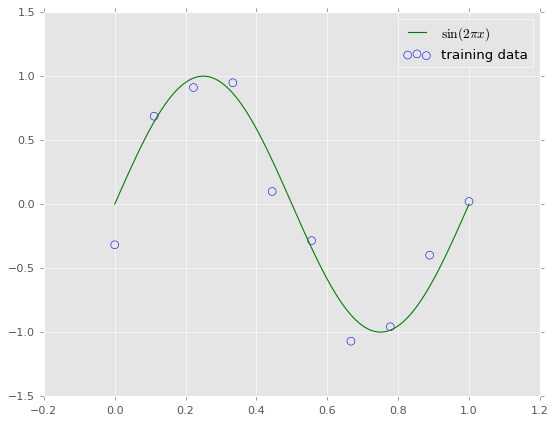

In [71]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [72]:
x_val, y_val = create_toy_data(func, 10, 0.25)

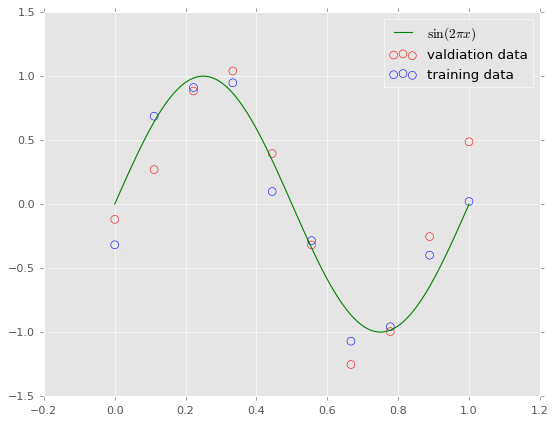

In [73]:
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="valdiation data")
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [74]:
def pre_process(x,num):
    x_new = np.ones((x.shape[0], 1)).reshape(-1,1)
    x = x.reshape(-1,1)
    for i in range(1,num+1):
        x_new = np.hstack((x_new, x**i))
    print(x_new)
    return x_new

def mse(actual, predict):
    return np.sum(np.square(actual - predict))

In [75]:
x1=  pre_process(x_train,1);
x3= pre_process(x_train,3);
x9= pre_process(x_train,9);
x9.shape

[[1.         0.        ]
 [1.         0.11111111]
 [1.         0.22222222]
 [1.         0.33333333]
 [1.         0.44444444]
 [1.         0.55555556]
 [1.         0.66666667]
 [1.         0.77777778]
 [1.         0.88888889]
 [1.         1.        ]]
[[1.         0.         0.         0.        ]
 [1.         0.11111111 0.01234568 0.00137174]
 [1.         0.22222222 0.04938272 0.01097394]
 [1.         0.33333333 0.11111111 0.03703704]
 [1.         0.44444444 0.19753086 0.0877915 ]
 [1.         0.55555556 0.30864198 0.17146776]
 [1.         0.66666667 0.44444444 0.2962963 ]
 [1.         0.77777778 0.60493827 0.47050754]
 [1.         0.88888889 0.79012346 0.70233196]
 [1.         1.         1.         1.        ]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.11111111e-01 1.23456790e-02 1.37174211e-03
  1.52415790e-04 1.69350878e-05 1.88167642e-06 2.09075158e-

(10, 10)

In [76]:
w1 = np.dot(np.linalg.inv(np.dot(x1.T,x1)), np.dot(x1.T,y_train))
w3 = np.dot(np.linalg.inv(np.dot(x3.T,x3)), np.dot(x3.T,y_train))
w9 = np.dot(np.linalg.inv(np.dot(x9.T,x9)), np.dot(x9.T,y_train))

In [77]:
x_dummy = np.linspace(0, 1, 100)
x1_pr=  pre_process(x_dummy,1)
x3_pr= pre_process(x_dummy,3)
x9_pr= pre_process(x_dummy,9)

[[1.         0.        ]
 [1.         0.01010101]
 [1.         0.02020202]
 [1.         0.03030303]
 [1.         0.04040404]
 [1.         0.05050505]
 [1.         0.06060606]
 [1.         0.07070707]
 [1.         0.08080808]
 [1.         0.09090909]
 [1.         0.1010101 ]
 [1.         0.11111111]
 [1.         0.12121212]
 [1.         0.13131313]
 [1.         0.14141414]
 [1.         0.15151515]
 [1.         0.16161616]
 [1.         0.17171717]
 [1.         0.18181818]
 [1.         0.19191919]
 [1.         0.2020202 ]
 [1.         0.21212121]
 [1.         0.22222222]
 [1.         0.23232323]
 [1.         0.24242424]
 [1.         0.25252525]
 [1.         0.26262626]
 [1.         0.27272727]
 [1.         0.28282828]
 [1.         0.29292929]
 [1.         0.3030303 ]
 [1.         0.31313131]
 [1.         0.32323232]
 [1.         0.33333333]
 [1.         0.34343434]
 [1.         0.35353535]
 [1.         0.36363636]
 [1.         0.37373737]
 [1.         0.38383838]
 [1.         0.39393939]


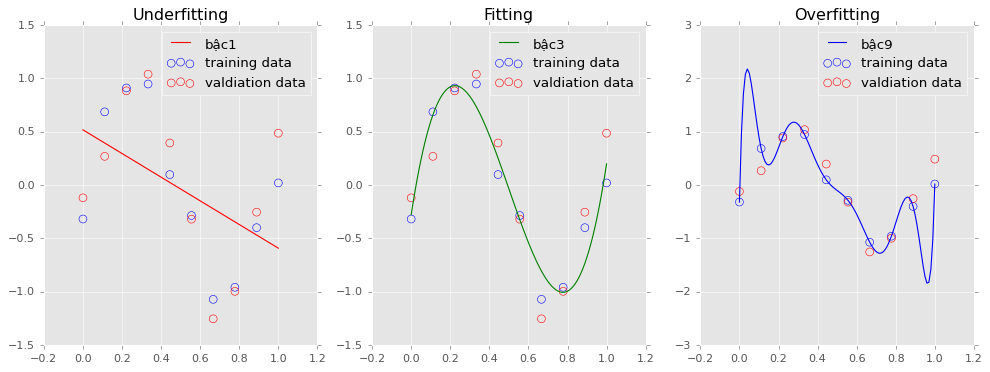

In [78]:
pre1 = np.dot(x1_pr, w1)
pre3 = np.dot(x3_pr, w3)
pre9 = np.dot(x9_pr, w9)
x_dummy = np.linspace(0, 1, 100)

plt.figure(figsize=(15,5))
plt.title("Đánh giá")
plt.subplot(131)
plt.title("Underfitting")
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="valdiation data")
plt.plot(x_dummy,pre1, c="r", label="bậc1")
plt.legend()

plt.subplot(132)
plt.title("Fitting")
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="valdiation data")
plt.plot(x_dummy,pre3, c="g", label="bậc3")
plt.legend()

plt.subplot(133)
plt.title("Overfitting")
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="valdiation data")
plt.plot(x_dummy,pre9, c="b", label="bậc9")
plt.legend()
plt.show()

In [79]:
x1_val=  pre_process(x_val,1)
x3_val= pre_process(x_val,3)
x9_val= pre_process(x_val,9)

y1 = np.dot(x1_val, w1)
y3 = np.dot(x3_val, w3)
y9 = np.dot(x9_val, w9)

[[1.         0.        ]
 [1.         0.11111111]
 [1.         0.22222222]
 [1.         0.33333333]
 [1.         0.44444444]
 [1.         0.55555556]
 [1.         0.66666667]
 [1.         0.77777778]
 [1.         0.88888889]
 [1.         1.        ]]
[[1.         0.         0.         0.        ]
 [1.         0.11111111 0.01234568 0.00137174]
 [1.         0.22222222 0.04938272 0.01097394]
 [1.         0.33333333 0.11111111 0.03703704]
 [1.         0.44444444 0.19753086 0.0877915 ]
 [1.         0.55555556 0.30864198 0.17146776]
 [1.         0.66666667 0.44444444 0.2962963 ]
 [1.         0.77777778 0.60493827 0.47050754]
 [1.         0.88888889 0.79012346 0.70233196]
 [1.         1.         1.         1.        ]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.11111111e-01 1.23456790e-02 1.37174211e-03
  1.52415790e-04 1.69350878e-05 1.88167642e-06 2.09075158e-

In [80]:
print('Lost in val: ')
loss1 = (np.sum(y1-y_val))**2/x_val.shape[0]
loss3 = (np.sum(y3-y_val))**2/x_val.shape[0]
loss9 = (np.sum(y9-y_val))**2/x_val.shape[0]
print("loss bậc 1: {}\nloss bậc 3: {}\nloss bậc 9: {}\n".format(loss1,loss3,loss9))

Lost in val: 
loss bậc 1: 0.025017188289070035
loss bậc 3: 0.025017188289086917
loss bậc 9: 0.025076153544520075



In [81]:
print('Lost in train: ')
y1_train = np.dot(x1, w1)
y3_train = np.dot(x3, w3)
y9_train = np.dot(x9, w9)

loss1_train = (np.sum(y1_train-y_train))**2/x_train.shape[0]
loss3_train = (np.sum(y3_train-y_train))**2/x_train.shape[0]
loss9_train = (np.sum(y9_train-y_train))**2/x_train.shape[0]
print("loss bậc 1: {}\nloss bậc 3: {}\nloss bậc 9: {}\n".format(loss1_train,loss3_train,loss9_train))

Lost in train: 
loss bậc 1: 2.415886522239349e-31
loss bậc 3: 2.7955702063028793e-27
loss bậc 9: 3.470423840161742e-08



In [82]:
X_train_9= pre_process(x_train,9)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.11111111e-01 1.23456790e-02 1.37174211e-03
  1.52415790e-04 1.69350878e-05 1.88167642e-06 2.09075158e-07
  2.32305731e-08 2.58117479e-09]
 [1.00000000e+00 2.22222222e-01 4.93827160e-02 1.09739369e-02
  2.43865264e-03 5.41922810e-04 1.20427291e-04 2.67616202e-05
  5.94702672e-06 1.32156149e-06]
 [1.00000000e+00 3.33333333e-01 1.11111111e-01 3.70370370e-02
  1.23456790e-02 4.11522634e-03 1.37174211e-03 4.57247371e-04
  1.52415790e-04 5.08052634e-05]
 [1.00000000e+00 4.44444444e-01 1.97530864e-01 8.77914952e-02
  3.90184423e-02 1.73415299e-02 7.70734663e-03 3.42548739e-03
  1.52243884e-03 6.76639485e-04]
 [1.00000000e+00 5.55555556e-01 3.08641975e-01 1.71467764e-01
  9.52598689e-02 5.29221494e-02 2.94011941e-02 1.63339967e-02
  9.07444263e-03 5.04135702e-03]
 [1.00000000e+00 6.66666667e-01 4.44444444e-01 2.96296296e

In [83]:
train_loss = {}
val_loss = {}

for i in np.arange(0, 0.0001, 0.00002):
    w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train_9),X_train_9) + np.identity(X_train_9.shape[0])*i), np.dot(np.transpose(X_train_9),y_train))
    pred_9 = np.dot(X_train_9,w)
    train_loss[i] = np.sum((y_train-pred_9)**2)
    pred_val_9 = np.dot(pre_process(x_val,9),w)
    val_loss[i] = np.sum((y_val-pred_val_9)**2)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.11111111e-01 1.23456790e-02 1.37174211e-03
  1.52415790e-04 1.69350878e-05 1.88167642e-06 2.09075158e-07
  2.32305731e-08 2.58117479e-09]
 [1.00000000e+00 2.22222222e-01 4.93827160e-02 1.09739369e-02
  2.43865264e-03 5.41922810e-04 1.20427291e-04 2.67616202e-05
  5.94702672e-06 1.32156149e-06]
 [1.00000000e+00 3.33333333e-01 1.11111111e-01 3.70370370e-02
  1.23456790e-02 4.11522634e-03 1.37174211e-03 4.57247371e-04
  1.52415790e-04 5.08052634e-05]
 [1.00000000e+00 4.44444444e-01 1.97530864e-01 8.77914952e-02
  3.90184423e-02 1.73415299e-02 7.70734663e-03 3.42548739e-03
  1.52243884e-03 6.76639485e-04]
 [1.00000000e+00 5.55555556e-01 3.08641975e-01 1.71467764e-01
  9.52598689e-02 5.29221494e-02 2.94011941e-02 1.63339967e-02
  9.07444263e-03 5.04135702e-03]
 [1.00000000e+00 6.66666667e-01 4.44444444e-01 2.96296296e

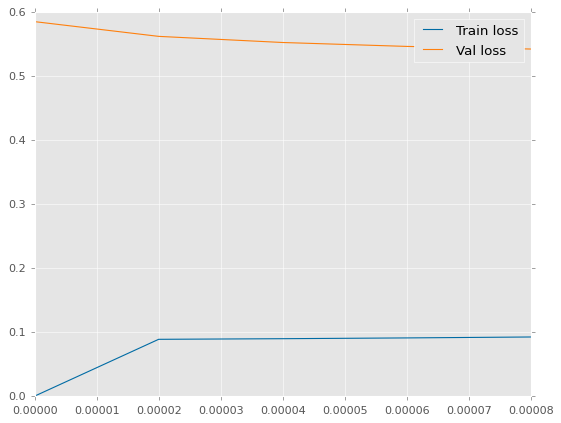

In [84]:
plt.plot(list(train_loss.keys()), list(train_loss.values()), label = 'Train loss')
plt.plot(list(val_loss.keys()), list(val_loss.values()), label = 'Val loss')
plt.legend()

In [85]:
w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train_9),X_train_9) + np.identity(X_train_9.shape[0]) \
                         * list(val_loss.keys())[np.argmin(list(val_loss.values()))]) \
                          , np.dot(np.transpose(X_train_9),y_train))

In [86]:
x_dummy = np.linspace(0, 1, 100)
X_dummy = pre_process(x_dummy, 9)
predict = np.dot(X_dummy,w)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.01010101e-02 1.02030405e-04 1.03061015e-06
  1.04102036e-08 1.05153571e-10 1.06215729e-12 1.07288615e-14
  1.08372338e-16 1.09467008e-18]
 [1.00000000e+00 2.02020202e-02 4.08121620e-04 8.24488122e-06
  1.66563257e-07 3.36491428e-09 6.79780663e-11 1.37329427e-12
  2.77433186e-14 5.60471082e-16]
 [1.00000000e+00 3.03030303e-02 9.18273646e-04 2.78264741e-05
  8.43226488e-07 2.55523178e-08 7.74312661e-10 2.34640200e-11
  7.11030910e-13 2.15463912e-14]
 [1.00000000e+00 4.04040404e-02 1.63248648e-03 6.59590497e-05
  2.66501211e-06 1.07677257e-07 4.35059624e-09 1.75781666e-10
  7.10228955e-12 2.86961194e-13]
 [1.00000000e+00 5.05050505e-02 2.55076013e-03 1.28826269e-04
  6.50637722e-06 3.28604910e-07 1.65962076e-08 8.38192302e-10
  4.23329446e-11 2.13802750e-12]
 [1.00000000e+00 6.06060606e-02 3.67309458e-03 2.22611793e

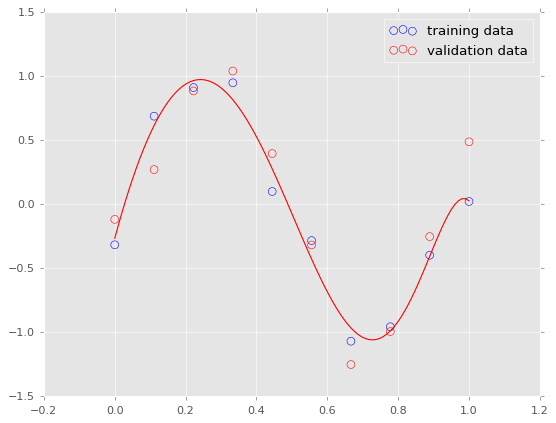

In [87]:
plt.plot(x_dummy, predict, 'r')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [88]:
pred_9 = np.dot(X_train_9,w)
loss_9 = mse(y_train,pred_9)
pred_val_9 = np.dot(pre_process(x_val,9),w)
loss_val_9 = mse(y_val,pred_val_9)
print('Loss in training set: {}'.format(loss_9))
print('Loss in validation set: {}'.format(loss_val_9))

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.11111111e-01 1.23456790e-02 1.37174211e-03
  1.52415790e-04 1.69350878e-05 1.88167642e-06 2.09075158e-07
  2.32305731e-08 2.58117479e-09]
 [1.00000000e+00 2.22222222e-01 4.93827160e-02 1.09739369e-02
  2.43865264e-03 5.41922810e-04 1.20427291e-04 2.67616202e-05
  5.94702672e-06 1.32156149e-06]
 [1.00000000e+00 3.33333333e-01 1.11111111e-01 3.70370370e-02
  1.23456790e-02 4.11522634e-03 1.37174211e-03 4.57247371e-04
  1.52415790e-04 5.08052634e-05]
 [1.00000000e+00 4.44444444e-01 1.97530864e-01 8.77914952e-02
  3.90184423e-02 1.73415299e-02 7.70734663e-03 3.42548739e-03
  1.52243884e-03 6.76639485e-04]
 [1.00000000e+00 5.55555556e-01 3.08641975e-01 1.71467764e-01
  9.52598689e-02 5.29221494e-02 2.94011941e-02 1.63339967e-02
  9.07444263e-03 5.04135702e-03]
 [1.00000000e+00 6.66666667e-01 4.44444444e-01 2.96296296e

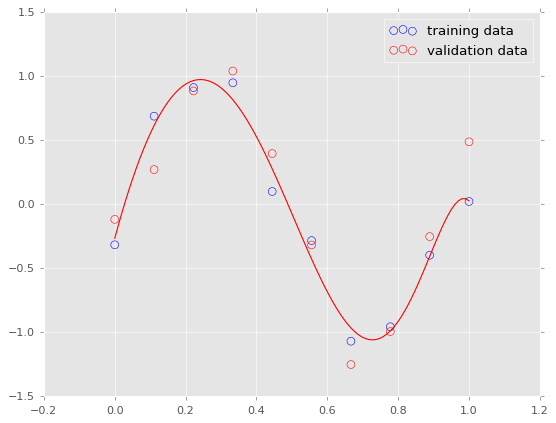

In [89]:
plt.plot(x_dummy, predict, 'r')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

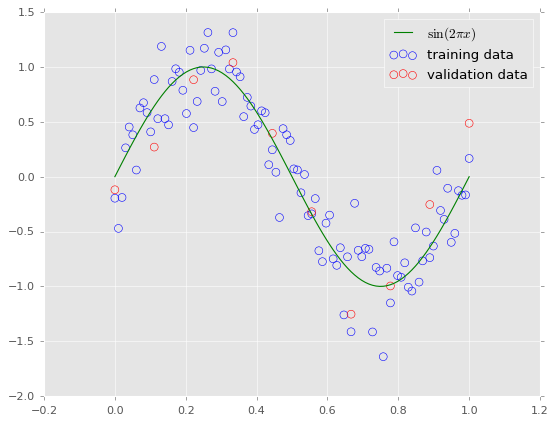

In [90]:
x_train, y_train = create_toy_data(func, 100, 0.25)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [91]:
X_train_9 = pre_process(x_train, 9)
w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train_9),X_train_9)), np.dot(np.transpose(X_train_9),y_train))
x_dummy = np.linspace(0, 1, 100)
X_dummy = pre_process(x_dummy, 9)
predict = np.dot(X_dummy,w)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.01010101e-02 1.02030405e-04 1.03061015e-06
  1.04102036e-08 1.05153571e-10 1.06215729e-12 1.07288615e-14
  1.08372338e-16 1.09467008e-18]
 [1.00000000e+00 2.02020202e-02 4.08121620e-04 8.24488122e-06
  1.66563257e-07 3.36491428e-09 6.79780663e-11 1.37329427e-12
  2.77433186e-14 5.60471082e-16]
 [1.00000000e+00 3.03030303e-02 9.18273646e-04 2.78264741e-05
  8.43226488e-07 2.55523178e-08 7.74312661e-10 2.34640200e-11
  7.11030910e-13 2.15463912e-14]
 [1.00000000e+00 4.04040404e-02 1.63248648e-03 6.59590497e-05
  2.66501211e-06 1.07677257e-07 4.35059624e-09 1.75781666e-10
  7.10228955e-12 2.86961194e-13]
 [1.00000000e+00 5.05050505e-02 2.55076013e-03 1.28826269e-04
  6.50637722e-06 3.28604910e-07 1.65962076e-08 8.38192302e-10
  4.23329446e-11 2.13802750e-12]
 [1.00000000e+00 6.06060606e-02 3.67309458e-03 2.22611793e